# Working with Time Series

In [1]:
import numpy as np
import pandas as pd
from vega_datasets import data


#### For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.



### San Francisco Temps Data

In [2]:
# ! pip install vega_datasets

In [3]:
sf = data.sf_temps()

In [4]:
sf.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
sf.shape, sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


((8759, 2), None)

First Impressions:
- looks like there are no null values
- the dtypes seem appropriate
- features are date and temp
- temp is currently set as the index
- need to change index to time


In [6]:
# just gonna experiment with some methods now.
# breaks on method, sf.date.dt.year()
# these are attributes
sf.date.dt.year, sf.date.dt.month, sf.date.dt.day, sf.date.dt.hour,\
sf.date.dt.minute, sf.date.dt.second


(0       2010
 1       2010
 2       2010
 3       2010
 4       2010
         ... 
 8754    2010
 8755    2010
 8756    2010
 8757    2010
 8758    2010
 Name: date, Length: 8759, dtype: int64,
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 8754    12
 8755    12
 8756    12
 8757    12
 8758    12
 Name: date, Length: 8759, dtype: int64,
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 8754    31
 8755    31
 8756    31
 8757    31
 8758    31
 Name: date, Length: 8759, dtype: int64,
 0        0
 1        1
 2        2
 3        3
 4        4
         ..
 8754    19
 8755    20
 8756    21
 8757    22
 8758    23
 Name: date, Length: 8759, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 8754    0
 8755    0
 8756    0
 8757    0
 8758    0
 Name: date, Length: 8759, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 8754    0
 8755    0
 8756    0
 8757    0
 8758    0
 Na

In [7]:
# now to try out some ordinal values
sf.date.dt.week, sf.date.dt.weekday, sf.date.dt.isocalendar().week

/var/folders/pd/dk0dsnvs72ng9hv5mkv2d0980000gn/T/ipykernel_30369/668973470.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sf.date.dt.week, sf.date.dt.weekday, sf.date.dt.isocalendar().week


(0       53
 1       53
 2       53
 3       53
 4       53
         ..
 8754    52
 8755    52
 8756    52
 8757    52
 8758    52
 Name: date, Length: 8759, dtype: int64,
 0       4
 1       4
 2       4
 3       4
 4       4
        ..
 8754    4
 8755    4
 8756    4
 8757    4
 8758    4
 Name: date, Length: 8759, dtype: int64,
 0       53
 1       53
 2       53
 3       53
 4       53
         ..
 8754    52
 8755    52
 8756    52
 8757    52
 8758    52
 Name: week, Length: 8759, dtype: UInt32)

In [8]:
# weekday returns the integer number of the day of
# the week from 1-7
sf.date.dt.weekday

0       4
1       4
2       4
3       4
4       4
       ..
8754    4
8755    4
8756    4
8757    4
8758    4
Name: date, Length: 8759, dtype: int64

In [9]:
# weekday_name returns the weekday name
# sf.date.dt.weekday_name
# this doesn't work
# found it was deprecated and replace with .day_name()
sf.date.dt.day_name()  # now a method for some reason

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
8754    Friday
8755    Friday
8756    Friday
8757    Friday
8758    Friday
Name: date, Length: 8759, dtype: object

In [10]:
print(pd.__version__)

1.4.4


In [11]:
# ok, enough playing.
# set the index to the date and sort by date ascending.
sf = sf.set_index('date').sort_index()

In [12]:
sf.head(), sf.tail()

(                     temp
 date                     
 2010-01-01 00:00:00  47.8
 2010-01-01 01:00:00  47.4
 2010-01-01 02:00:00  46.9
 2010-01-01 03:00:00  46.5
 2010-01-01 04:00:00  46.0,
                      temp
 date                     
 2010-12-31 19:00:00  50.4
 2010-12-31 20:00:00  49.9
 2010-12-31 21:00:00  49.4
 2010-12-31 22:00:00  48.8
 2010-12-31 23:00:00  48.3)

In [13]:
# ok, looks like we have a year of data from 2010
# with a sample temp every hour
# quick test of calling dt attributes directly now that date is index
sf.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=8759)

In [14]:
# sf['2010-12-25'] produces a future warning, use .loc
# instead when using a single slice.
sf.loc['2010-12-25']

,temp
date,
2010-12-25 00:00:00,47.7
2010-12-25 01:00:00,47.4
2010-12-25 02:00:00,46.8
2010-12-25 03:00:00,46.5
2010-12-25 04:00:00,46.0
2010-12-25 05:00:00,45.9
2010-12-25 06:00:00,45.8
2010-12-25 07:00:00,45.9
2010-12-25 08:00:00,46.2


In [15]:
sf['2010-12-05' : '2010-12-06']

,temp
date,
2010-12-05 00:00:00,50.2
2010-12-05 01:00:00,49.9
2010-12-05 02:00:00,49.4
2010-12-05 03:00:00,49.0
2010-12-05 04:00:00,48.6
2010-12-05 05:00:00,48.5
2010-12-05 06:00:00,48.6
2010-12-05 07:00:00,48.7
2010-12-05 08:00:00,49.5


In [16]:
# Upsampling: is resampling the data such that it is at a
# smaller time window, increasing the number of data points
# changing frequency from weekly to daily is upsampling which creates nulls
# common ways to deal with these are fill with 0, backfill, forward fill,
# interpolation.
# Downsampling: resampling our data over a larger time window. decreasing
# the number of data points.
# one way to do this is with the .asfreq() method
# see docstring for argument codes

##### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.



In [17]:
daily_temp_af = sf.asfreq('D')
daily_temp_af.head()

,temp
date,
2010-01-01,47.8
2010-01-02,47.9
2010-01-03,48.0
2010-01-04,48.1
2010-01-05,48.0


In [18]:
# .asfreq() and .resample() are both pandas methods.
# .asfreq doesn't fill or aggregate the data, it just
# takes the first value it finds in the prescribed period
# and uses that to represent the larger period when downsampling
# or inserts NAN's where there are blank vals in upsampling.
# it seems that using resample is the better choice when resampling

In [19]:
daily_temp = sf.resample('D').mean()
daily_temp

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

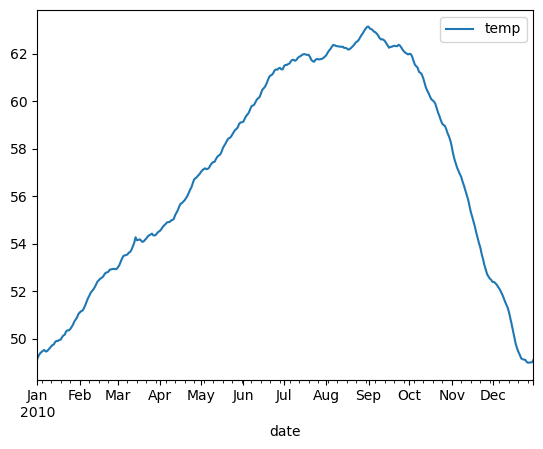

In [20]:
daily_temp.plot()


##### 2. Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

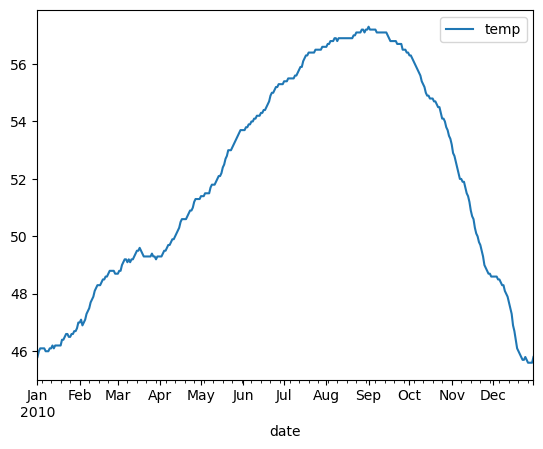

In [21]:
min_daily_temp = sf.resample('D').min()
min_daily_temp.plot()

##### 3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

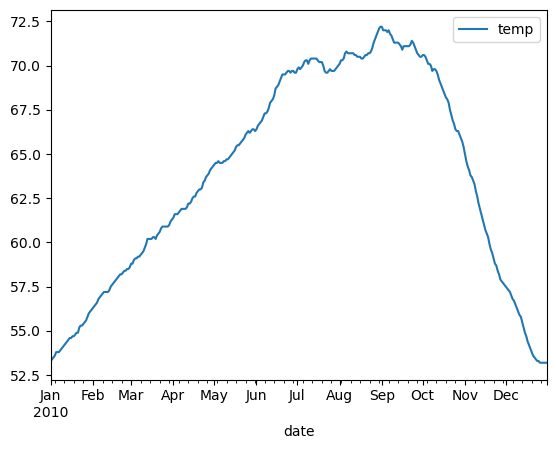

In [22]:
max_daily_temp = sf.resample('D').max()
max_daily_temp.plot()

##### 4. Which month is the coldest, on average?


In [23]:
monthly_avg_temp = sf.resample('M').mean().sort_values('temp')
monthly_avg_temp

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


January is the coldest month on average

##### 5. Which month has the highest average temperature?


September has the highest average temperature

##### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [24]:
daily_min_max = sf.resample('D').agg(['min', 'max'])


In [25]:
daily_min_max['daily_temp_delta'] = (daily_min_max.loc[
    :,('temp', 'max')] - daily_min_max.loc[:,('temp', 'min')])
monthly_daily_delta = daily_min_max.resample('M').daily_temp_delta.mean().sort_values(ascending=False)
monthly_daily_delta

date
2010-09-30    14.403333
2010-07-31    13.977419
2010-06-30    13.950000
2010-08-31    13.870968
2010-10-31    13.432258
2010-05-31    12.909677
2010-04-30    12.320000
2010-03-31    10.854839
2010-11-30    10.236667
2010-02-28     9.485714
2010-01-31     8.341935
2010-12-31     7.925806
Name: daily_temp_delta, dtype: float64

September has the highest average daily variability.

##### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


### Seattle Weather Data

In [26]:
sea = data.seattle_weather()

In [27]:
sea.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [28]:
sea.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [29]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [30]:
# data looks good, no nulls, need to set date as index, appropriate dtypes
# note: there is an object feature this time.

In [31]:
sea = sea.set_index('date')
sea.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


##### 1. Which year and month combination has the highest amount of precipitation?


In [32]:
monthly_precip = sea.resample('M').agg('sum').sort_values('precipitation', ascending=False)
monthly_precip.head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


##### 2. Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

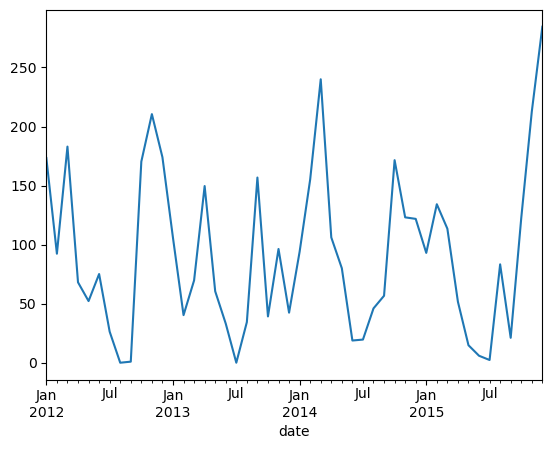

In [34]:
sea.resample('M').precipitation.sum().plot()

##### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

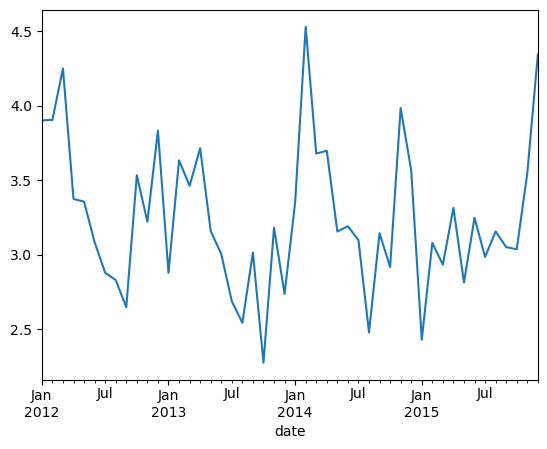

In [35]:
sea.resample('M').wind.mean().plot()

##### 4. Which year-month combination is the windiest?


In [41]:
sea.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [40]:
sea.resample('M').wind.sum().idxmax().strftime('%B, %Y')

'December, 2015'

##### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [42]:
sea.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

It appears 2014 was sunniest.

##### 6. In which month does it rain the most?


In [48]:
monthly_rain = pd.DataFrame(sea.resample('M').precipitation.sum())
monthly_rain['month'] = monthly_rain.index.strftime('%B')
monthly_rain.groupby('month').precipitation.sum()
monthly_rain.groupby('month').precipitation.sum().idxmax()

'November'

##### 7. Which month has the most number of days with a non-zero amount of precipitation?


In [49]:
sea['rained'] = np.where(sea['precipitation'] == 0, 0, 1)
sea.resample('M').rained.sum().idxmax().strftime('%B, %Y')

'December, 2012'

### Flights 20k Data

In [50]:
fl = data.flights_20k()

In [51]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [52]:
fl.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [53]:
# data looks good, need to set date to index, no nulls, appropriates dtypes

In [54]:
fl.set_index('date', inplace=True)
fl.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


##### 1. Convert any negative delays to 0.


In [55]:
fl['delay'] = np.where(fl['delay'] < 0, 0, fl['delay'])
fl.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


##### 2. Which hour of the day has the highest average delay?


In [56]:
fl['hour'] = fl.index.strftime('%H')
fl.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [59]:
fl.groupby(fl.hour).delay.mean().idxmax()

'03'

##### 3. Does the day of the week make a difference in the delay amount?


In [61]:
fl['day_of_week'] = fl.index.strftime('%A')
fl.head()

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [64]:
fl.groupby('day_of_week').delay.mean()

day_of_week
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

Don't fly on Friday

##### 4. Does the month make a difference in the delay amount?


In [66]:
fl['month'] = fl.index.strftime('%B')
fl.head()

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [67]:
fl.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64